In [1]:
import numpy as np
import time
from tqdm import tnrange, tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
class ThreeSum:
    def __init__(self, input_data):
        self.data = input_data
        self.data_sorted = input_data

    def naive_method(self):        
        counter = 0
        for i in tnrange(0, len(self.data), 1, desc='naive loop'):
            for j in range(i+1, len(self.data), 1):
                for k in range(j+1, len(self.data), 1):
                    #print(i,j,k)
                    if self.data[i] + self.data[j] + self.data[k] == 0:
                        counter += 1
                    
        return counter

    def runtime_naive(self):
        time_start = time.time()
        self.naive_method()
        time_finish = time.time()
        time_run = time_finish - time_start
        return time_run

    def binary_research(self, input_array, input_low, target):
        low = input_low
        high = len(input_array)
        while low < high:
            mid = (low + high) // 2
            if input_array[mid] < target:
                low = mid + 1
            elif input_array[mid] > target:
                high = mid
            else:
                return True
        return False

    def binary_method(self):
        #print(self.data_sorted)
        counter = 0
        for i in tnrange(0, len(self.data_sorted), 1, desc='binary loop'):
            for j in range(i+1, len(self.data_sorted), 1):
                target = self.data_sorted[i] + self.data_sorted[j]
                #print(target)
                if self.binary_research(self.data_sorted, j+1, -target):
                    #print("with i=", self.data_sorted[i], "j=", self.data_sorted[j], \
                    #    "search for", -target, self.binary_research(self.data_sorted, j+1, -target))
                    counter += 1
        return counter

    def runtime_binary(self):
        time_start = time.time()
        self.binary_method()
        time_finish = time.time()
        time_run = time_finish - time_start
        return time_run

In [3]:
input_data_8 = np.loadtxt('Q1_dataset/8int.txt', int)
input_data_32 = np.loadtxt('Q1_dataset/32int.txt', int)
input_data_128 = np.loadtxt('Q1_dataset/128int.txt', int)
input_data_512 = np.loadtxt('Q1_dataset/512int.txt', int)
input_data_1024 = np.loadtxt('Q1_dataset/1024int.txt', int)
input_data_4096 = np.loadtxt('Q1_dataset/4096int.txt', int)
input_data_4192 = np.loadtxt('Q1_dataset/4192int.txt', int)
input_data_8192 = np.loadtxt('Q1_dataset/8192int.txt', int)

bit_8 = ThreeSum(input_data_8)
bit_32 = ThreeSum(input_data_32)
bit_128 = ThreeSum(input_data_128)
bit_512 = ThreeSum(input_data_512)
bit_1024 = ThreeSum(input_data_1024)
bit_4096 = ThreeSum(input_data_4096)
bit_4192 = ThreeSum(input_data_4192)
bit_8192 = ThreeSum(input_data_8192)

#print("naive method", bit_1024.naive_method())
#print("2 sum method", bit_1024.binary_method())

input_number = [8, 32, 128, 512, 1024, 4096, 4192, 8192]
input_number_naive = [8, 32, 128, 512, 1024]
runtime_naive = [bit_8.runtime_naive(), bit_32.runtime_naive(), bit_128.runtime_naive(), bit_512.runtime_naive(), \
    bit_1024.runtime_naive()]
runtime_binary = [bit_8.runtime_binary(), bit_32.runtime_binary(), bit_128.runtime_binary(), bit_512.runtime_binary(),\
    bit_1024.runtime_binary(), bit_4096.runtime_binary(), bit_4192.runtime_binary(), bit_8192.runtime_binary()]


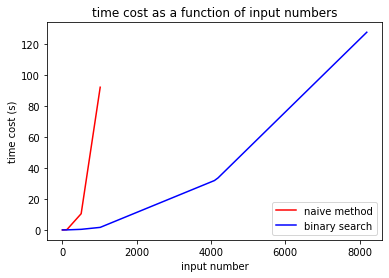

In [11]:
np.savetxt('./navie_run_time.txt', runtime_naive, fmt='%f')
np.savetxt('./binary_run_time.txt', runtime_binary, fmt='%f')

plt.plot(input_number_naive, runtime_naive, 'r', label = 'naive method' )
plt.plot(input_number, runtime_binary, 'b', label = 'binary search')
plt.title('time cost as a function of input numbers')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.legend(loc='lower right')
plt.savefig('./plot.jpg')
plt.show()